In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
loan = pd.read_csv("loan.csv",low_memory=False)

# Investigating the shape of the data

In [3]:
len(loan) #number of rows

39717

In [4]:
loan.head() #data at a glance

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Treating missing values

In [6]:
loan.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### We're unable to look at all the columns since the number is huge, its better to Visualize missing values to discover which ones need attention

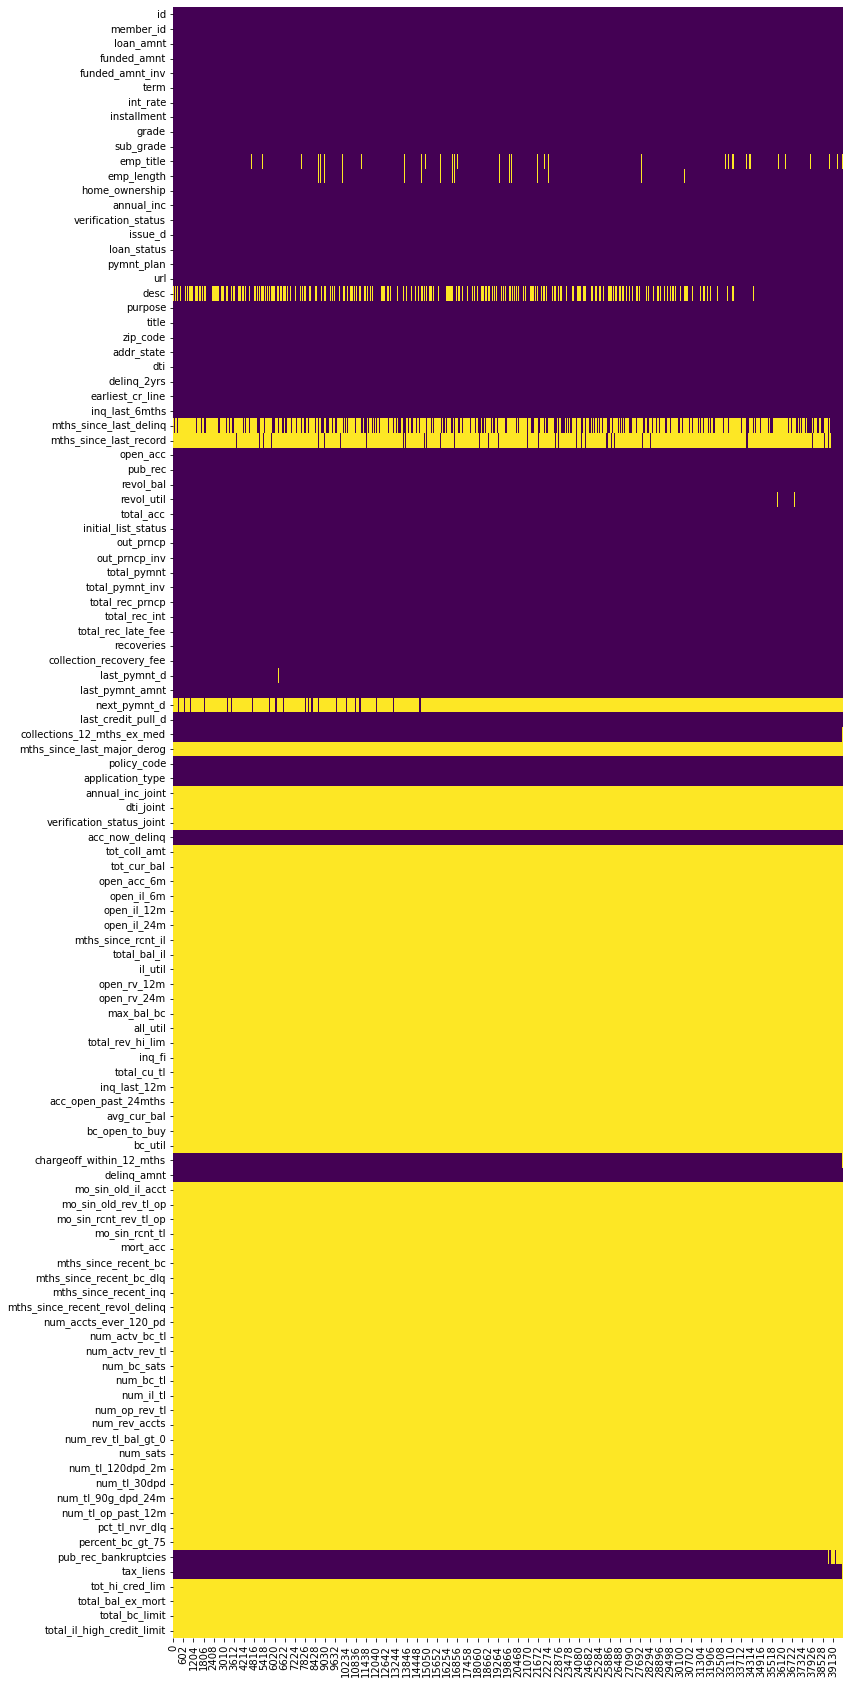

In [7]:
plt.figure(figsize=(12,30))
sns.heatmap(loan.isna().transpose(),
            cmap="viridis",cbar=False)
plt.show()

#### A lot of columns seem to have only missing values, it's ideal to drop those columns altogether with a condition over missing values

In [8]:
loan.dropna(axis=1,how='all',inplace=True) #how='all' will drop any columns that contain only missing values

In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

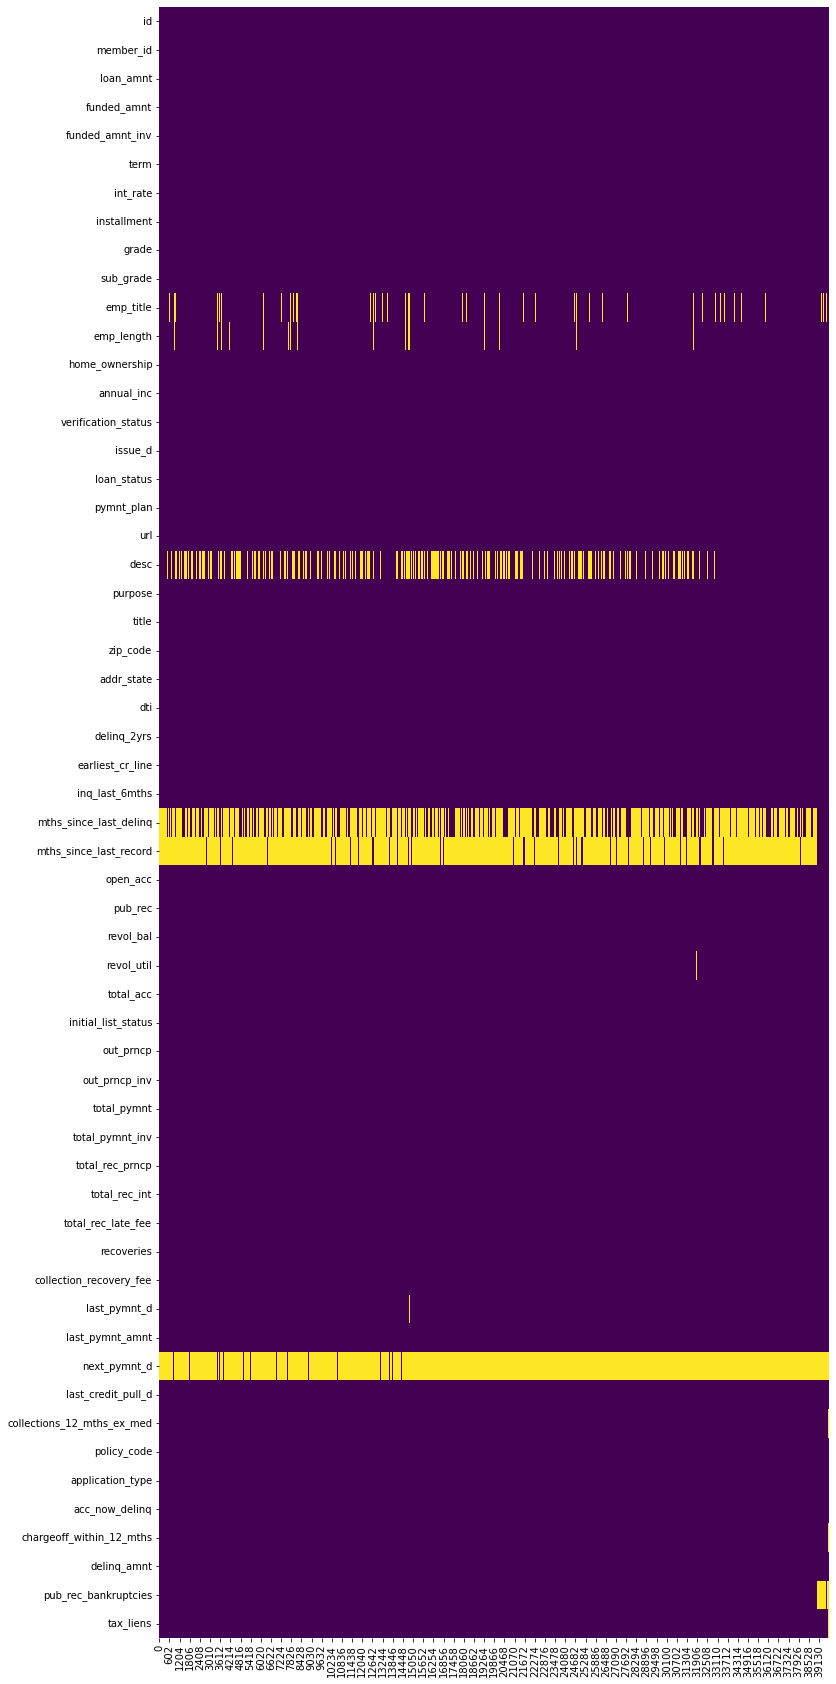

In [10]:
plt.figure(figsize=(12,30))
sns.heatmap(loan.isna().transpose(),
            cmap="viridis",cbar=False)
plt.show()

In [11]:
## finding % missing values by each column

pd.DataFrame(loan.isna().sum(),columns=['Values']).apply(lambda x:(x/len(loan))*100).sort_values(by='Values',ascending=False)

,Values
next_pymnt_d,97.129693
mths_since_last_record,92.985372
mths_since_last_delinq,64.662487
desc,32.580507
emp_title,6.191303
emp_length,2.706650
pub_rec_bankruptcies,1.754916
last_pymnt_d,0.178765
chargeoff_within_12_mths,0.140998
collections_12_mths_ex_med,0.140998


### Top 4-5 rows here are the columns that have the highest number of missing values, need those to be cleaned up since they do not contribute to the analysis

In [12]:
loan.drop(labels=['next_pymnt_d','mths_since_last_delinq','mths_since_last_record','desc'],axis=1,inplace=True)

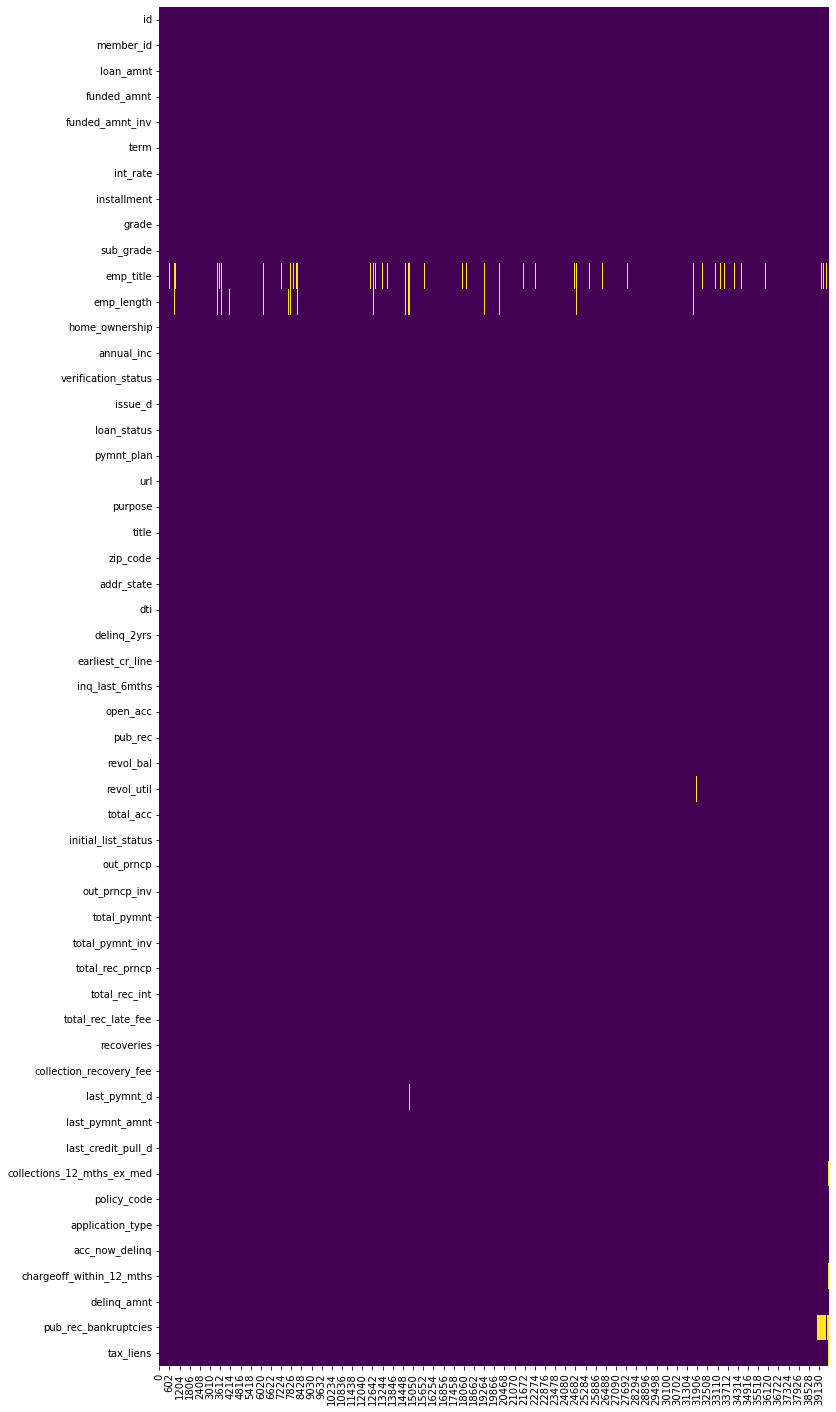

In [13]:
plt.figure(figsize=(12,25))
sns.heatmap(loan.isna().transpose(),
            cmap="viridis",cbar=False)
plt.show()

In [14]:
pd.DataFrame(loan.isna().sum(),columns=['Values']).sort_values(by='Values',ascending=False)

,Values
emp_title,2459
emp_length,1075
pub_rec_bankruptcies,697
last_pymnt_d,71
collections_12_mths_ex_med,56
chargeoff_within_12_mths,56
revol_util,50
tax_liens,39
title,11
last_credit_pull_d,2


In [15]:
## dropping irrelevant columns
loan = loan.drop(['id','member_id','emp_title','url','collections_12_mths_ex_med','policy_code','acc_now_delinq'
           ,'chargeoff_within_12_mths','delinq_amnt','pub_rec_bankruptcies','tax_liens','earliest_cr_line'],axis=1)

#### We can drop rest of the missing values since they do not significantly impact the size of dataset to be analyzed

In [16]:
loan.dropna(subset=['emp_length','last_pymnt_d'
                    ,'revol_util','title','last_credit_pull_d'],inplace=True)

# Variable data type study and conversion
    - Study the existing Data types.
    - Convert them appropriately.
    - Clean up variables

In [17]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38521 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38521 non-null  int64  
 1   funded_amnt              38521 non-null  int64  
 2   funded_amnt_inv          38521 non-null  float64
 3   term                     38521 non-null  object 
 4   int_rate                 38521 non-null  object 
 5   installment              38521 non-null  float64
 6   grade                    38521 non-null  object 
 7   sub_grade                38521 non-null  object 
 8   emp_length               38521 non-null  object 
 9   home_ownership           38521 non-null  object 
 10  annual_inc               38521 non-null  float64
 11  verification_status      38521 non-null  object 
 12  issue_d                  38521 non-null  object 
 13  loan_status              38521 non-null  object 
 14  pymnt_plan            

In [18]:
loan.home_ownership.value_counts()

RENT        18406
MORTGAGE    17186
OWN          2830
OTHER          96
NONE            3
Name: home_ownership, dtype: int64

In [19]:
loan[~(loan['home_ownership'].isin(['OTHER','NONE']))]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,INDIVIDUAL
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,INDIVIDUAL
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,INDIVIDUAL
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,...,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,INDIVIDUAL
39713,8500,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,...,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,INDIVIDUAL
39714,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,...,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,INDIVIDUAL
39715,5000,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,...,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,INDIVIDUAL


In [20]:
loan.delinq_2yrs.value_counts(normalize=True)

0     0.891124
1     0.083539
2     0.017263
3     0.005529
4     0.001532
5     0.000545
6     0.000260
7     0.000104
8     0.000052
9     0.000026
11    0.000026
Name: delinq_2yrs, dtype: float64

`89% are zeros hence qualify for a column drop`

In [21]:
loan.drop('delinq_2yrs',axis=1,inplace=True)

In [22]:
loan.pymnt_plan.value_counts(normalize=True)

n    1.0
Name: pymnt_plan, dtype: float64

In [23]:
loan.drop('pymnt_plan',axis=1,inplace=True)

In [24]:
loan.application_type.value_counts(normalize=True)

INDIVIDUAL    1.0
Name: application_type, dtype: float64

In [25]:
loan.drop('application_type',axis=1,inplace=True)

In [26]:
loan.total_rec_late_fee.value_counts(normalize=True)

0.000000     0.948366
15.000000    0.006308
30.000000    0.001402
15.000000    0.001402
15.000000    0.001090
               ...   
67.606386    0.000026
24.330000    0.000026
37.088716    0.000026
14.957851    0.000026
19.890000    0.000026
Name: total_rec_late_fee, Length: 1327, dtype: float64

`94% fall under zero so column can be dropped`

In [27]:
loan.drop('total_rec_late_fee',axis=1,inplace=True)

<AxesSubplot:xlabel='loan_status', ylabel='installment'>

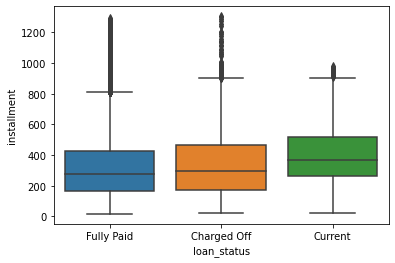

In [28]:
sns.boxplot(x='loan_status',y='installment',data=loan)

          No significant impact of installments

In [29]:
loan.drop('installment',axis=1,inplace=True)

In [30]:
loan.select_dtypes(include=['int64','float64'])

,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt
0,5000,5000,4975.0,24000.0,27.65,1,3,0,13648,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,171.62
1,2500,2500,2500.0,30000.0,1.00,5,3,0,1687,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,117.08,1.11,119.66
2,2400,2400,2400.0,12252.0,8.72,2,2,0,2956,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,649.91
3,10000,10000,10000.0,49200.0,20.00,1,10,0,5598,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,0.00,0.00,357.48
4,3000,3000,3000.0,80000.0,17.94,0,15,0,27783,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,67.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,110000.0,11.33,0,13,0,7274,40,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,80.90
39713,8500,8500,875.0,18000.0,6.40,1,6,0,8847,9,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,281.94
39714,5000,5000,1325.0,100000.0,2.30,0,11,0,9698,20,0.00,0.00,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00
39715,5000,5000,650.0,200000.0,3.72,0,17,0,85607,26,0.00,0.00,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00


In [31]:
## Converting number types: integer and float

loan['term'] = loan['term'].apply(lambda x:int(x[:3]))

loan['int_rate'] = loan['int_rate'].apply((lambda x:float(x[:-1])))

loan['revol_util'] = loan['revol_util'].apply((lambda x:float(x[:-1])))

In [32]:
loan.select_dtypes(include=['object'])

,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,initial_list_status,last_pymnt_d,last_credit_pull_d
0,B,B2,10+ years,RENT,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,f,Jan-15,May-16
1,C,C4,< 1 year,RENT,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,f,Apr-13,Sep-13
2,C,C5,10+ years,RENT,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,f,Jun-14,May-16
3,C,C1,10+ years,RENT,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,f,Jan-15,Apr-16
4,B,B5,1 year,RENT,Source Verified,Dec-11,Current,other,Personal,972xx,OR,f,May-16,May-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,A,A4,4 years,MORTGAGE,Not Verified,Jul-07,Fully Paid,home_improvement,Home Improvement,802xx,CO,f,Jul-10,Jun-10
39713,C,C1,3 years,RENT,Not Verified,Jul-07,Fully Paid,credit_card,Retiring credit card debt,274xx,NC,f,Jul-10,Jul-10
39714,A,A4,< 1 year,MORTGAGE,Not Verified,Jul-07,Fully Paid,debt_consolidation,MBA Loan Consolidation,017xx,MA,f,Apr-08,Jun-07
39715,A,A2,< 1 year,MORTGAGE,Not Verified,Jul-07,Fully Paid,other,JAL Loan,208xx,MD,f,Jan-08,Jun-07


In [34]:
## Converting date types from object type

loan[['issue_d','last_pymnt_d','last_credit_pull_d']] = loan[['issue_d','last_pymnt_d','last_credit_pull_d']].apply(lambda x:'01-'+x)

loan[['issue_d','last_pymnt_d','last_credit_pull_d']] = loan[['issue_d','last_pymnt_d','last_credit_pull_d']].apply(lambda x: pd.to_datetime(x,infer_datetime_format=True,errors='coerce'))

#### Issuing support columns

In [35]:
loan['issue_yr'] = pd.DatetimeIndex(loan['issue_d']).year

In [36]:
loan['issue_yr'] = loan['issue_yr'].apply(str)

In [37]:
def emp_length_facet(i):
        if i == '10+ years':
            return 'Managerial'
        elif i in ['9 years','8 years','7 years'] :
            return 'Senior'
        elif i in ['4 years' , '3 years' ,'2 years' , '1 years']:
            return 'Junior'
        else:
            return 'Entry'

loan['emp_level'] = loan['emp_length'].apply(emp_length_facet)

In [38]:
loan.dti.describe()

count    38521.000000
mean        13.332196
std          6.664551
min          0.000000
25%          8.210000
50%         13.420000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

In [39]:
def dti_range(x):
    if x <= 8.00: ##Congruent with 25th Percentile
        return 'low'
    elif (x >8.00 and x <= 15.00): ## 25th to 75th percentile
        return 'medium'
    else:
        return 'high'
loan['dti_level'] = loan['dti'].apply(dti_range)

### Relevancy check on the target variable

#### We can drop the status = 'current' since that does not impact our analysis

In [40]:
loan = loan[loan['loan_status']!='Current']

/Users/absinha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

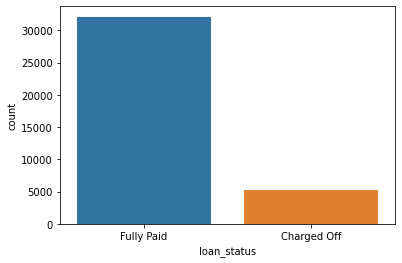

In [41]:
sns.countplot(loan['loan_status'])

## Univariate analysis (With and without segments)

In [42]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37423 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                37423 non-null  int64         
 1   funded_amnt              37423 non-null  int64         
 2   funded_amnt_inv          37423 non-null  float64       
 3   term                     37423 non-null  int64         
 4   int_rate                 37423 non-null  float64       
 5   grade                    37423 non-null  object        
 6   sub_grade                37423 non-null  object        
 7   emp_length               37423 non-null  object        
 8   home_ownership           37423 non-null  object        
 9   annual_inc               37423 non-null  float64       
 10  verification_status      37423 non-null  object        
 11  issue_d                  37423 non-null  datetime64[ns]
 12  loan_status              37423 n

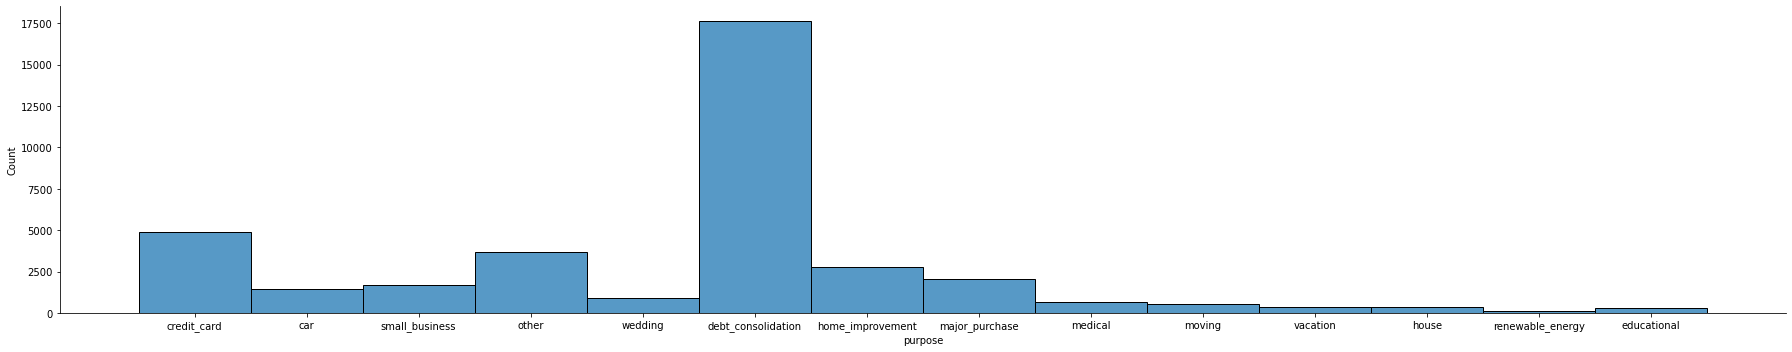

In [43]:
sns.displot(x=loan['purpose'],aspect=5)

`Most of the purpose encapsulates 'debt consolidation'`

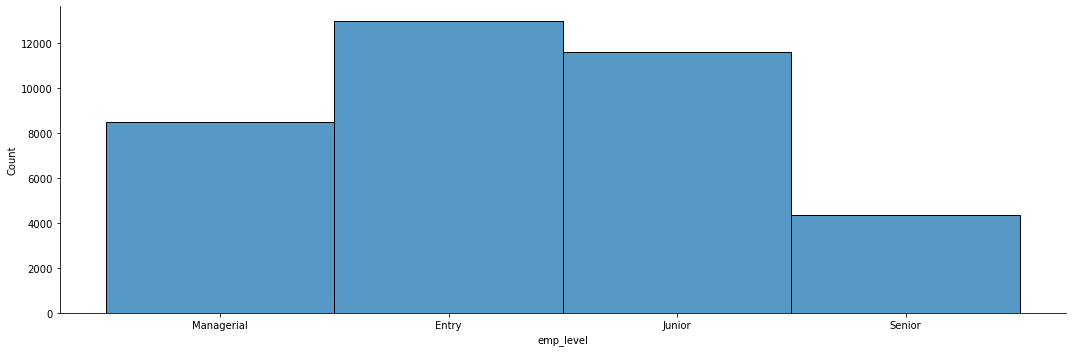

In [44]:
sns.displot(loan['emp_level'],aspect=3)

### Issue Year

In [45]:
loan['issue_yr'].value_counts()/len(loan)*100

2011    52.799081
2010    29.847954
2009    12.532400
2008     4.152527
2007     0.668038
Name: issue_yr, dtype: float64

`53% of all loans were sanctioned just in 2011`

In [46]:
(loan[['issue_yr','funded_amnt_inv']].groupby(by='issue_yr').sum())/loan['funded_amnt_inv'].sum()

,funded_amnt_inv
issue_yr,
2007,0.000795
2008,0.013034
2009,0.106195
2010,0.288505
2011,0.591471


`59% of total loan amount was sanctioned just in 2011`

In [47]:
loan_emp_pivot = loan[['emp_level','loan_status']].pivot_table(index='emp_level',columns='loan_status',aggfunc=len)
loan_emp_pivot.apply(lambda x:100*x/float(x.sum()),axis=1)

loan_status,Charged Off,Fully Paid
emp_level,,
Entry,14.035899,85.964101
Junior,13.448781,86.551219
Managerial,15.583343,84.416657
Senior,14.134924,85.865076


`No significant impact comes from the employee level`

### Purpose v/s Loan Status

In [48]:
loan_purpose_pivot = loan[['purpose','loan_status']].pivot_table(index='purpose',columns='loan_status',aggfunc=len)
loan_purpose_pivot.apply(lambda x:100*x/float(x.sum()),axis=1).sort_values(by='Charged Off',ascending=False)

loan_status,Charged Off,Fully Paid
purpose,,
small_business,26.705882,73.294118
renewable_energy,18.279570,81.720430
house,16.193182,83.806818
educational,16.129032,83.870968
other,15.853659,84.146341
medical,15.290520,84.709480
moving,15.272727,84.727273
debt_consolidation,15.005104,84.994896
vacation,14.409222,85.590778


> `Small Businesses are more likely to default on loans, lets dive deeper on this looking at yearly trends`

In [49]:
loan_purpose_pivot = loan[['purpose','loan_status','issue_yr']].pivot_table(index=['issue_yr','purpose'],columns='loan_status',aggfunc=len)
loan_purpose_pivot = loan_purpose_pivot.apply(lambda x:100*x/float(x.sum()),axis=1).sort_values(by='Charged Off',ascending=False)

In [50]:
loan_purpose_pivot.fillna(value=0,inplace=True)

In [51]:
loan_purpose_pivot.reset_index(drop=False,inplace=True)

In [52]:
loan_purpose_pivot

loan_status,issue_yr,purpose,Charged Off,Fully Paid
0,2007,moving,50.000000,50.000000
1,2007,small_business,38.461538,61.538462
2,2011,small_business,29.200463,70.799537
3,2008,small_business,27.472527,72.527473
4,2007,wedding,25.000000,75.000000
...,...,...,...,...
63,2007,vacation,0.000000,100.000000
64,2008,moving,0.000000,100.000000
65,2008,renewable_energy,0.000000,100.000000
66,2008,vacation,0.000000,100.000000


In [53]:
loan_purpose_pivot = loan_purpose_pivot[loan_purpose_pivot['purpose']=='small_business']

In [54]:
# Select only the columns we need
loan_purpose_pivot = loan_purpose_pivot[['issue_yr', 'Charged Off', 'Fully Paid']]

# Convert the data to long format
loan_purpose_pivot = pd.melt(loan_purpose_pivot, id_vars='issue_yr', var_name='status', value_name='percent')

In [55]:
loan_purpose_pivot.sort_values(by = 'issue_yr',inplace=True)

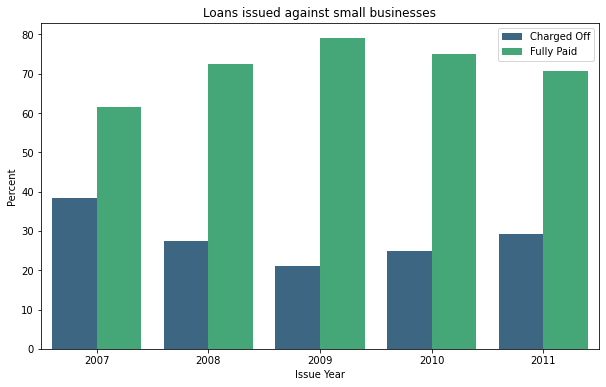

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(x='issue_yr', y='percent', hue='status', data=loan_purpose_pivot ,palette='viridis')
plt.legend()
plt.ylabel('Percent')
plt.xlabel('Issue Year')
plt.title('Loans issued against small businesses')
plt.show()

### Home Ownership v/s Loan Status

In [57]:
loan_ho_pivot = loan[['home_ownership','loan_status','issue_yr']].pivot_table(index=['issue_yr','home_ownership'],columns='loan_status',aggfunc=len)
loan_ho_pivot.apply(lambda x:100*x/float(x.sum()),axis=1).sort_values(by=['issue_yr'],ascending=False)

loan_status              Charged Off  Fully Paid
issue_yr home_ownership                         
2011     RENT              16.493056   83.506944
         OWN               16.223977   83.776023
         OTHER            100.000000         NaN
         MORTGAGE          14.395016   85.604984
2010     RENT              12.984604   87.015396
         OWN               13.308913   86.691087
         OTHER            100.000000         NaN
         MORTGAGE          11.637757   88.362243
2009     OWN               10.096154   89.903846
         RENT              13.075658   86.924342
         OTHER             19.117647   80.882353
         MORTGAGE          11.668546   88.331454
2008     RENT              14.510278   85.489722
         OWN               12.844037   87.155963
         OTHER              8.000000   92.000000
         NONE                    NaN  100.000000
         MORTGAGE          18.074324   81.925676
2007     NONE                    NaN  100.000000
         RENT              15.384615   84.615385
         OWN               18.181818   81.818182
         MORTGAGE          21.875000   78.125000

`No significant impact of house ownership`

### Grades v/s Loan Status

In [58]:
loan_sg_pivot = loan[['grade','loan_status']].pivot_table(index=['grade'],columns='loan_status',aggfunc=len)
loan_sg_pivot.apply(lambda x:100*x/float(x.sum()),axis=1).sort_values(by='Charged Off',ascending=True)

loan_status,Charged Off,Fully Paid
grade,,
A,5.719022,94.280978
B,11.832128,88.167872
C,16.544407,83.455593
D,21.609056,78.390944
E,26.451365,73.548635
F,32.528856,67.471144
G,32.653061,67.346939


`Strong correlationship between grades and loan_status - Higher the grade, more likely they're to pay`

> Investigating further looking up loan distribution on Sub-Grades

In [59]:
loan.grade.value_counts(normalize=True)

B    0.303076
A    0.257916
C    0.203992
D    0.132191
E    0.069503
F    0.025466
G    0.007856
Name: grade, dtype: float64

`75% of all loans lie between grade A - C`

In [60]:
loan_vs_pivot = loan[['verification_status','loan_status']].pivot_table(index=['verification_status'],columns='loan_status',aggfunc=len)
loan_vs_pivot.apply(lambda x:100*x/float(x.sum()),axis=1).sort_values(by='Charged Off',ascending=True)

loan_status,Charged Off,Fully Paid
verification_status,,
Not Verified,12.392055,87.607945
Source Verified,14.578491,85.421509
Verified,16.441039,83.558961


In [61]:
loan[['funded_amnt_inv','verification_status']].groupby(by='verification_status').sum()/loan['funded_amnt_inv'].sum()

,funded_amnt_inv
verification_status,
Not Verified,0.319453
Source Verified,0.234964
Verified,0.445583


`31% of loans sanctioned to unverified, which is an operational gap`

### Open Accounts v/s Loan Status

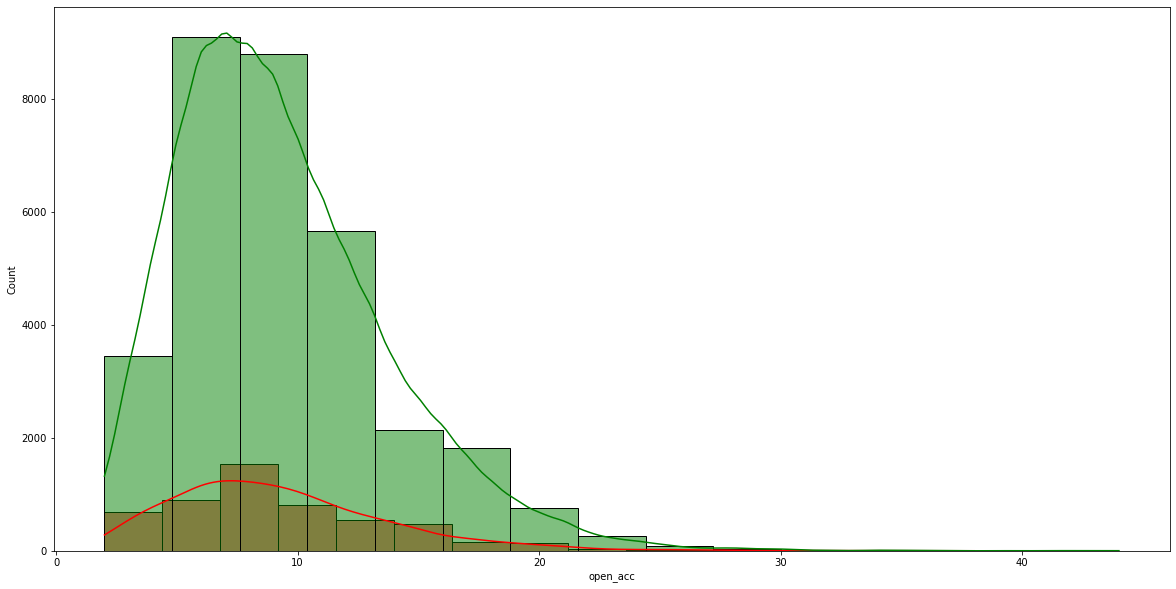

In [62]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.histplot(loan[loan['loan_status']=='Charged Off']['open_acc'],ax=ax,color='red',kde=True,bins=15)
sns.histplot(loan[loan['loan_status']=='Fully Paid']['open_acc'],ax=ax,color='green',kde=True,bins=15)
plt.show()

`both loan status peak at the same number of open accounts hence no conclusive relationship`

### Interest Rates v/s Loan Status

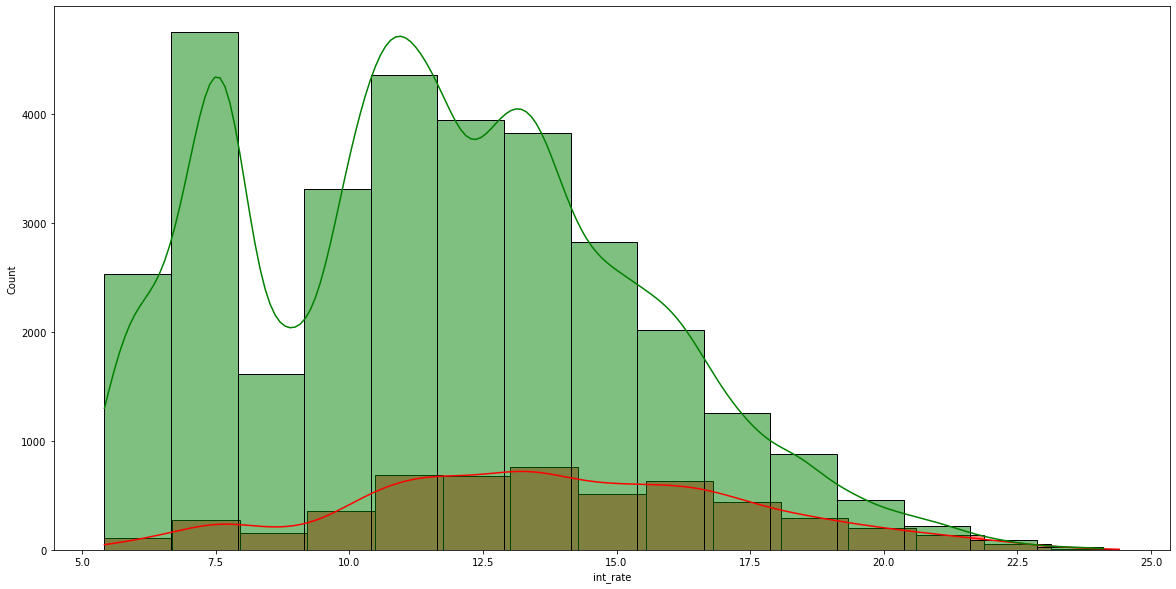

In [63]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.histplot(loan[loan['loan_status']=='Charged Off']['int_rate'],ax=ax,color='red',kde=True,bins=15)
sns.histplot(loan[loan['loan_status']=='Fully Paid']['int_rate'],ax=ax,color='green',kde=True,bins=15)
plt.show()

### DTI Levels v/s Loan Status

In [64]:
loan.dti_level.value_counts(normalize=True)

high      0.415653
medium    0.341555
low       0.242792
Name: dti_level, dtype: float64

In [65]:
loan_dti_pivot = loan[['dti_level','loan_status']].pivot_table(index=['dti_level'],columns='loan_status',aggfunc=len)
loan_dti_pivot.apply(lambda x:100*x/float(x.sum()),axis=1).sort_values(by='Charged Off',ascending=True)

loan_status,Charged Off,Fully Paid
dti_level,,
low,11.930442,88.069558
medium,13.933657,86.066343
high,15.782707,84.217293


`High DTI levels allude to higher charged off %`

In [66]:
totals_by_year = loan[['issue_yr', 'funded_amnt_inv']].groupby(by='issue_yr').sum()
grouped_by_year_and_level = loan[['dti_level', 'issue_yr', 'funded_amnt_inv']].groupby(by=['issue_yr', 'dti_level']).sum()
result = grouped_by_year_and_level / grouped_by_year_and_level.groupby(level=[0]).transform('sum')

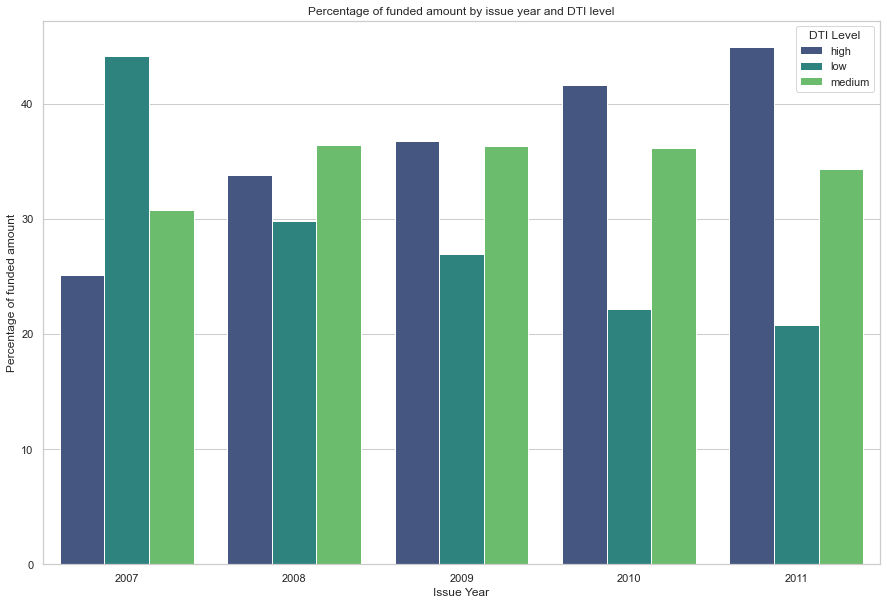

In [67]:
sns.set(style="whitegrid")
# Get the column names of the dataframe
column_names = grouped_by_year_and_level.columns.values

# We need to create a new column of our percentage (in other words, we are just replacing the values in 'funded_amnt_inv' with its percentage) in the grouped_by_year_and_level dataframe
grouped_by_year_and_level['funded_amnt_inv_percentage'] = grouped_by_year_and_level['funded_amnt_inv'] / grouped_by_year_and_level.groupby(level=0)['funded_amnt_inv'].sum() * 100

# now that we have the percentages, we can plot the data
plt.figure(figsize=(15,10))
ax = sns.barplot(x='issue_yr', y='funded_amnt_inv_percentage', hue='dti_level', data=grouped_by_year_and_level.reset_index(),palette='viridis')
ax.set_title('Percentage of funded amount by issue year and DTI level')
ax.set_ylabel('Percentage of funded amount')
ax.set_xlabel('Issue Year')
plt.legend(title='DTI Level')
plt.show()

`Higher DTI levels have been sanctioned loans progressively which is a warning signal`

# Bivariate

## Exp level with DTI against Loan Status

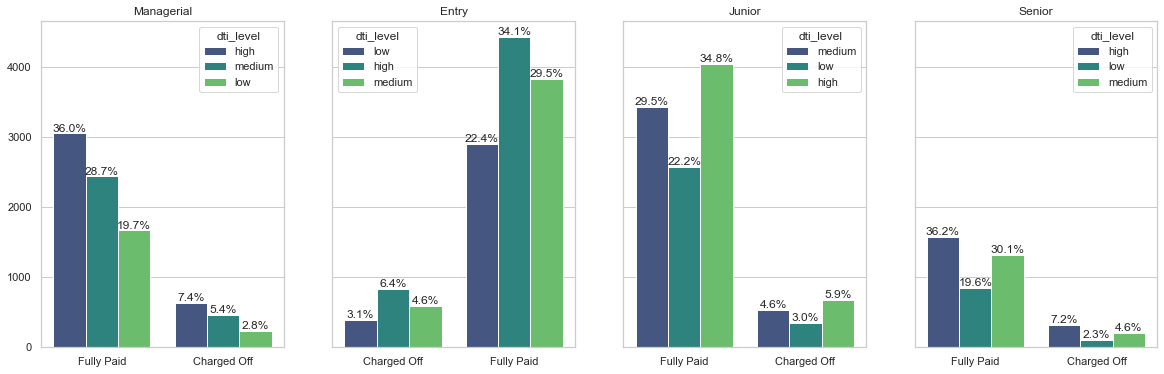

In [68]:
def plot_loan_status(loan, emp_level, ax):
    sns.countplot(x='loan_status', data=loan[loan['emp_level']==emp_level], ax=ax, hue='dti_level', palette='viridis')
    ax.set_ylabel('')
    ax.set_title(f"{emp_level}")
    ax.set_xlabel('')
    for i in ax.patches:
        x=i.get_bbox().get_points()[:,0]
        y=i.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/len(loan[loan['emp_level']==emp_level])), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    

fig, axs = plt.subplots(1,4,sharey=True,figsize=(20,6))
axs = axs.flatten()

for i, level in enumerate(loan['emp_level'].unique()):
    plot_loan_status(loan, level, axs[i])

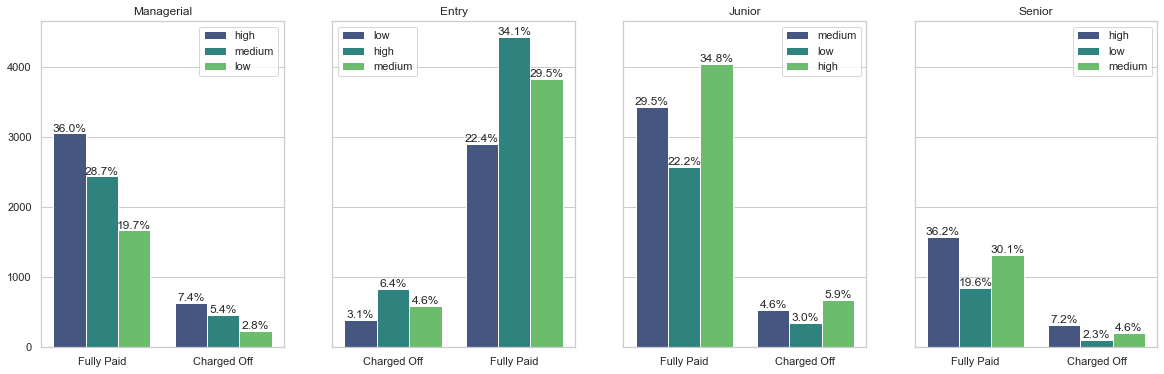

In [69]:
def plot_loan_status(loan, emp_level, ax):
    sns.countplot(x='loan_status', data=loan[loan['emp_level']==emp_level], ax=ax, hue='dti_level', palette='viridis')
    ax.set_ylabel('')
    ax.set_title(f"{emp_level}")
    ax.set_xlabel('')
    ax.legend()
    for i in ax.patches:
        x=i.get_bbox().get_points()[:,0]
        y=i.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/len(loan[loan['emp_level']==emp_level])), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

fig, axs = plt.subplots(1,4,sharey=True,figsize=(20,6))
axs = axs.flatten()

for i, level in enumerate(loan['emp_level'].unique()):
    plot_loan_status(loan, level, axs[i])

`The Legend is a bit off since each chart represents different colors`

> <b> Managerial levels </b>  at High DTI are more likely to default. <br>
> <b> Senior levels </b>  at High DTI are more likely to default. <br>
> <b> Junior levels </b>  at Medium & High DTI are more likely to default. <br>
> <b> Entry levels </b>  at High DTI are more likely to default. <br>

## Loan Purpose with DTI against Loan Status

In [70]:
loan['purpose'].value_counts()[:6]

debt_consolidation    17634
credit_card            4894
other                  3690
home_improvement       2779
major_purchase         2068
small_business         1700
Name: purpose, dtype: int64

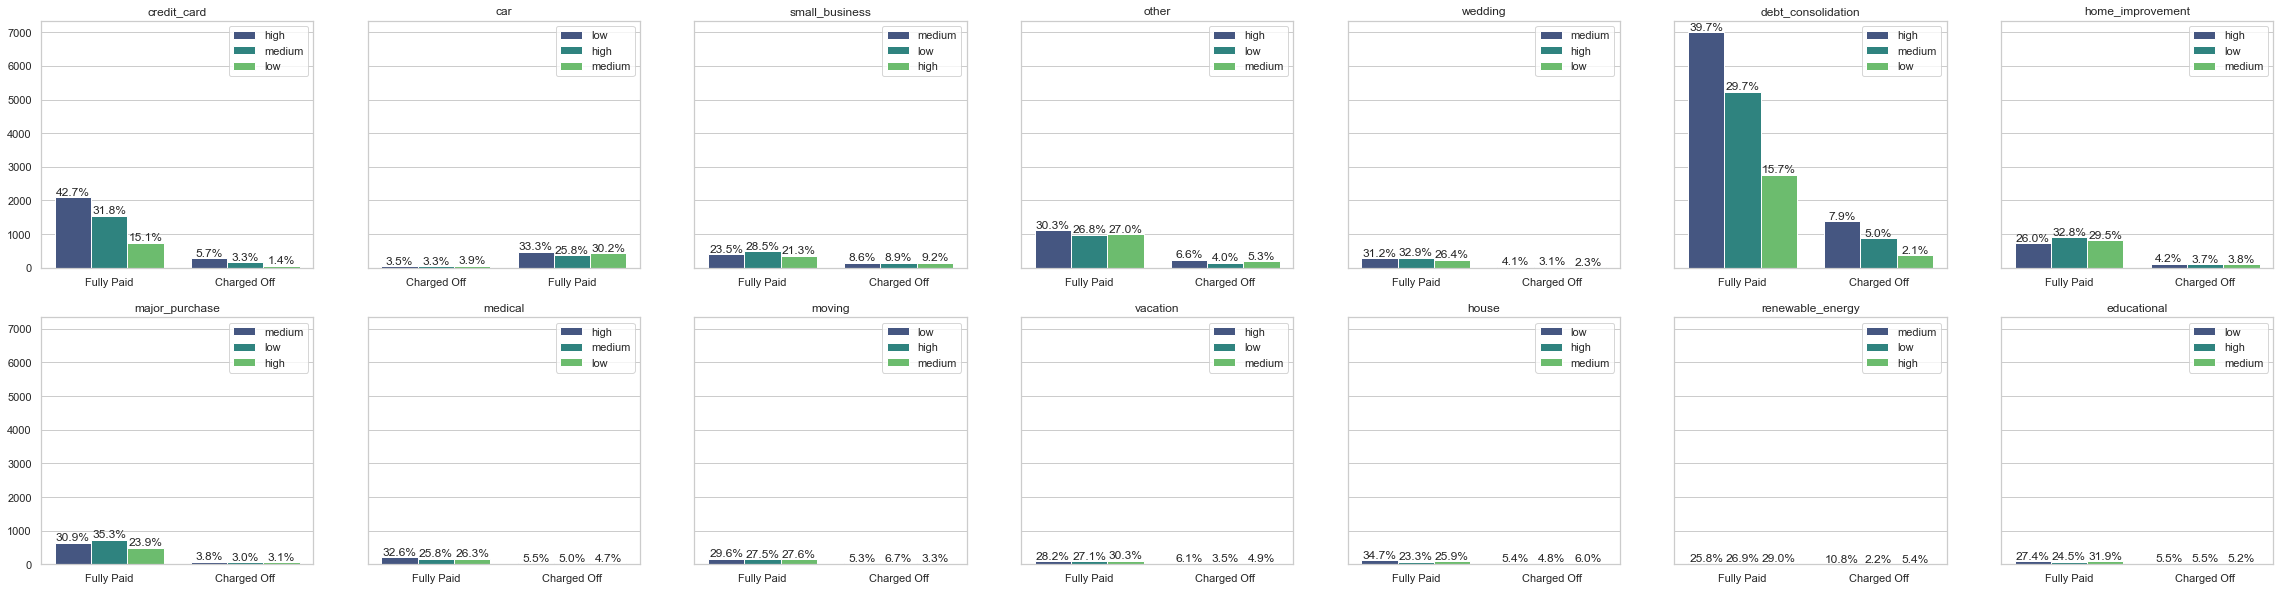

In [71]:
def plot_loan_purpose(loan, purpose, ax):
    sns.countplot(x='loan_status', data=loan[loan['purpose']==purpose], ax=ax, hue='dti_level', palette='viridis')
    ax.set_ylabel('')
    ax.set_title(f"{purpose}")
    ax.set_xlabel('')
    ax.legend()
    for i in ax.patches:
        x=i.get_bbox().get_points()[:,0]
        y=i.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/len(loan[loan['purpose']==purpose])), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

fig, axs = plt.subplots(2,7,sharey=True,figsize=(40,10))
axs = axs.flatten()

for i, level in enumerate(loan['purpose'].unique()):
    plot_loan_purpose(loan, level, axs[i])

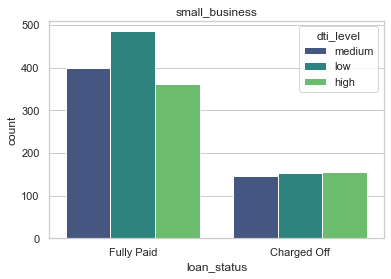

In [72]:
sns.countplot(x='loan_status', data=loan[loan['purpose']=='small_business'], hue='dti_level', palette='viridis')
plt.title('small_business')
plt.show()

`small business loans even at any DTI are risky`

## House Ownership with DTI against Loan Status

In [73]:
loan['home_ownership'].value_counts()

RENT        17996
MORTGAGE    16569
OWN          2759
OTHER          96
NONE            3
Name: home_ownership, dtype: int64

IndexError: index 3 is out of bounds for axis 0 with size 3

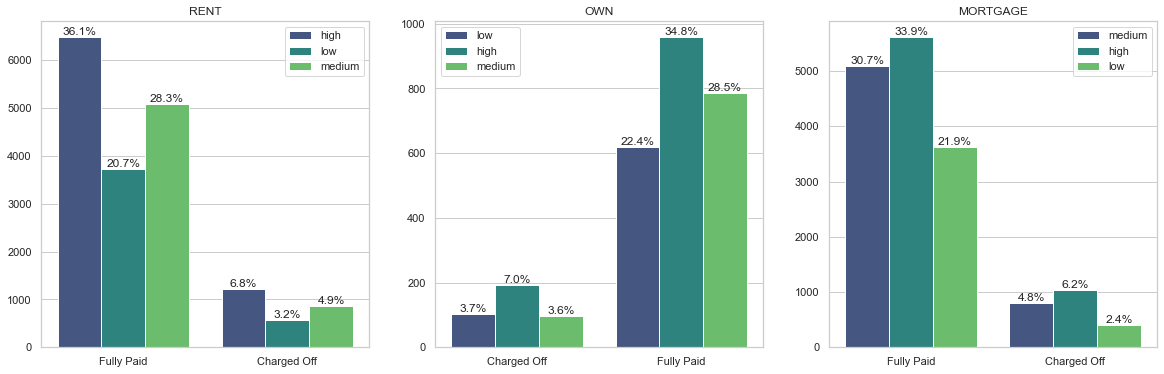

In [77]:
def plot_loan_status(loan, ho, ax):
    sns.countplot(x='loan_status', data=loan[loan['home_ownership']==ho], ax=ax, hue='dti_level', palette='viridis')
    ax.set_ylabel('')
    ax.set_title(f"{ho}")
    ax.set_xlabel('')
    ax.legend()
    for i in ax.patches:
        x=i.get_bbox().get_points()[:,0]
        y=i.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/len(loan[loan['home_ownership']==ho])), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

fig, axs = plt.subplots(1,3,sharey=False,figsize=(20,6))
axs = axs.flatten()

for i, level in enumerate(loan['home_ownership'].unique()):
    plot_loan_status(loan, level, axs[i])

`Rent ownership, even at low DTI posesses a default risk`

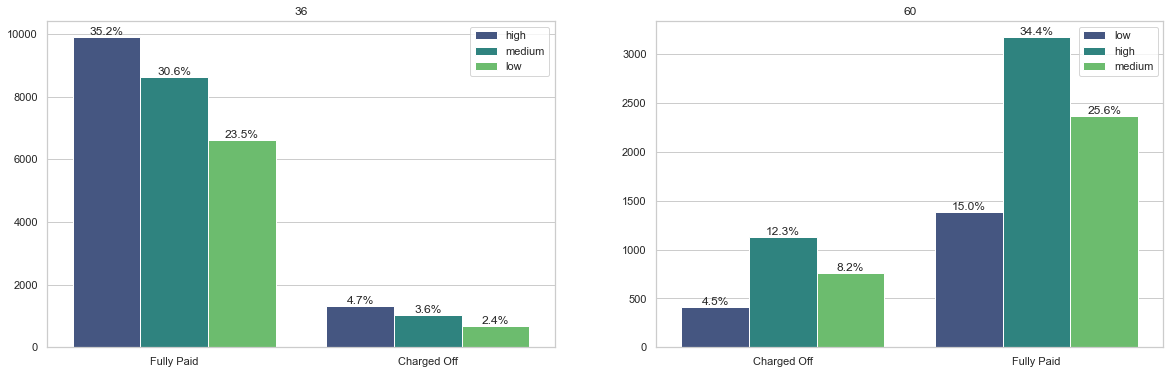

In [75]:
def plot_loan_status(loan, ho, ax):
    sns.countplot(x='loan_status', data=loan[loan['term']==ho], ax=ax, hue='dti_level', palette='viridis')
    ax.set_ylabel('')
    ax.set_title(f"{ho}")
    ax.set_xlabel('')
    ax.legend()
    for i in ax.patches:
        x=i.get_bbox().get_points()[:,0]
        y=i.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/len(loan[loan['term']==ho])), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

fig, axs = plt.subplots(1,2,sharey=False,figsize=(20,6))
axs = axs.flatten()

for i, level in enumerate(loan['term'].unique()):
    plot_loan_status(loan, level, axs[i])

`longer term loans are sanctioned even at high DTI resulting in higher defaults`

 <b> --------------------------------------------- END OF ANALYSIS ------------------------------------------------------- <b>